In [90]:
!pip install networkx
!pip install scipy

[4, 2, 5, 3, 3, 10, 2, 2, 2, 1, 2, 2, 2, 1, 3, 5, 2, 2, 2, 2, 2, 1, 3, 3, 6, 4, 4, 3, 3, 3, 2, 1, 4, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 4, 2, 1, 9, 2, 1, 1, 3, 2, 2, 2, 2, 4, 2, 3, 9, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 5, 3, 1, 4, 1, 3, 2, 2, 2, 2, 2, 1, 3, 2, 2, 1, 5, 2, 1, 3, 1, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 6, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 3, 1, 2, 2, 1]


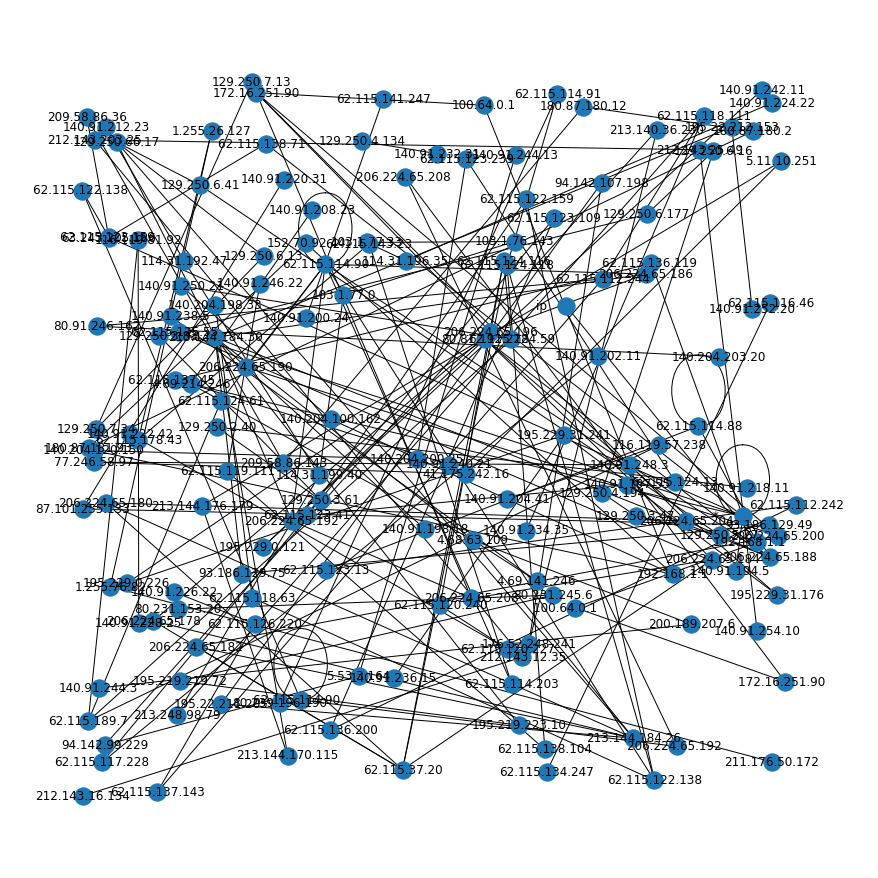

In [163]:
import networkx as nx
import csv
import os


# Create an empty graph and add nodes with IPs and sizes
G = nx.Graph()
# with open("dict.csv", newline='') as csvfile:
#     reader = csv.reader(csvfile)
#     for row in reader:
#         ip=row[0]
#         G.add_node(ip)

# nx.spring_layout(G)
plt.figure(3,figsize=(12,12)) 

base="/root/idp-castellotti-data/regions-oracle-traceroute/"
    
for file in os.listdir(base):
    filename = os.fsdecode(file)
    if "starlink" in filename and "ICMP" in filename:
#         print(filename)
        with open(base+filename,"r") as csvfile:
            d=list(csv.reader(csvfile))
            for r in range(len(d)-1):
                if d[r][2]!="ip" and d[r][2]!="*" and d[r+1][2]!="*":
                    ip1=d[r][2]
                    ip2=d[r+1][2]
                    G.add_edge(ip1,ip2)
            

# remove = [node for node,degree in dict(G.degree()).items() if degree < 0]
size = [val for (node, val) in G.degree()]
print(size)
# G.remove_nodes_from(remove)
nx.draw_random(G,with_labels=True)

308
308
308


ValueError: s must be a scalar, or float array-like with the same size as x and y

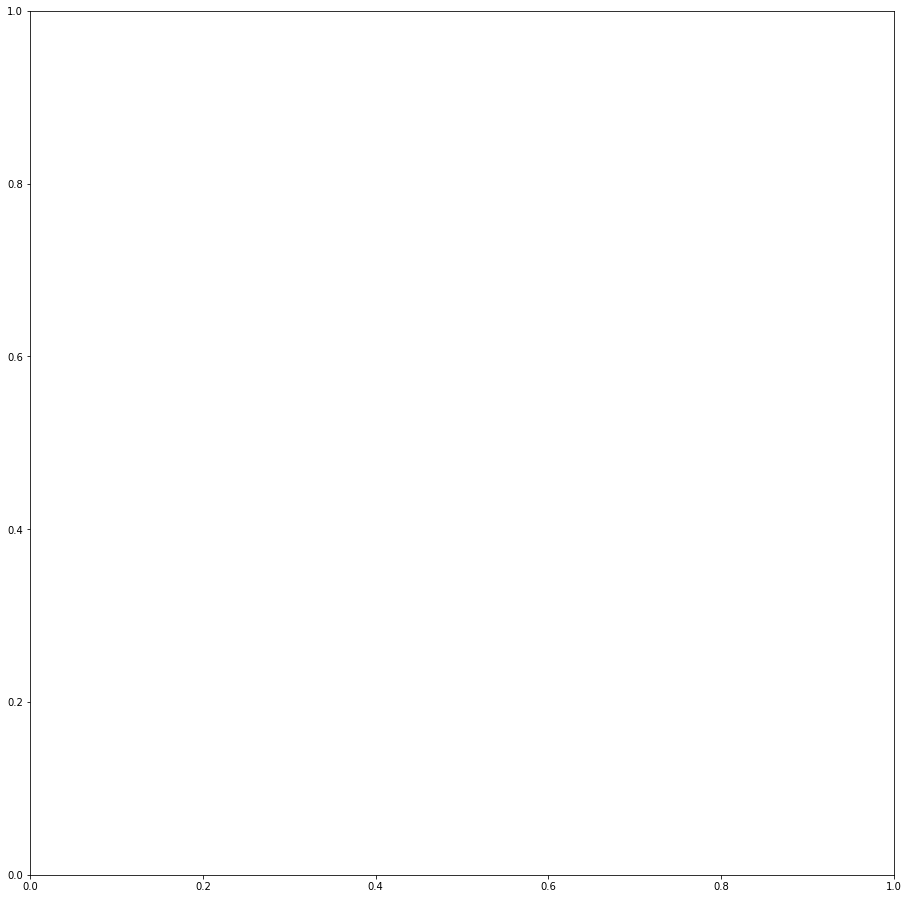

In [162]:
G = nx.Graph()
siz=[]
ipz=[]
with open("dict.csv", newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        ip=row[0]
        size=row[1]
        siz.append(size)
        ipz.append(ip)
print(len(ipz))
print(len(siz))
plt.figure(3,figsize=(12,12)) 
G.add_nodes_from(ipz)
print(len(G.nodes()))
nx.draw_random(G,node_size=siz)